## Description:

This notebook analyzes the computed linguistic scores for BPD and control users.  
It includes visualizations such as histograms, PCA plots, and Linear Discriminant Analysis (LDA) to explore the separability of the two groups based on features like sentiment, emotional instability, contradiction, and topic relevance.

# BPD Group Analysis (PCA + Clustering)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all score files
sentiment = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/Sentiment_scores.csv")
instability = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/Emotion_instability_scores.csv")
contradiction = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/Contradiction_scores.csv")
topic = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/Topic_scores_topN.csv")
# Invert sentiment score
sentiment['avg_self_reflection_sentiment'] *= -1

# Merge on user ID (assumed common key is 'user')
merged = sentiment.merge(instability, on="user", how="inner") \
                  .merge(contradiction, on="user", how="inner") \
                  .merge(topic, on="user", how="inner")

merged.to_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/BPD_scores.csv", index=False)

# Show merged dataset
merged.head

# Basic analysis
summary_stats = merged.describe()
summary_stats

,avg_self_reflection_sentiment,emotion_instability_score,contradiction_score,bpd_topic_score
count,380.000000,380.000000,380.000000,380.000000
mean,0.458791,0.710956,0.217261,0.234899
std,0.173016,0.103664,0.094722,0.130394
min,-0.218300,0.333333,0.000000,0.013652
25%,0.353600,0.641531,0.152009,0.142857
50%,0.477478,0.714286,0.206349,0.206944
75%,0.575779,0.778646,0.272727,0.290940
max,0.904765,1.000000,0.636364,0.785714


This suggests that on average:



*   Users reflect on themselves negatively (avg sentiment is below zero).
*   Emotional instability is fairly high (~71% emotion change rate).

*   About 22% of self-belief sentence pairs are contradictory.
*   Around 23% of their content aligns with BPD-related themes.

**1. Self-Reflection Sentiment**
Distribution shape: Left-skewed (more negative values dominate)
Interpretation:

Most users reflect on themselves negatively, often using self-critical or emotionally downcast language.

The sentiment model applied to self-belief sentences shows that positive self-talk is rare in this group.

This aligns with clinical descriptions of low self-worth and persistent negative self-image in BPD.

Implication: Negative self-perception is a consistent linguistic marker and may serve as a robust screening feature in future models.

**2. Emotion Instability Score**
Distribution shape: Right-skewed (many high values, few low)
Interpretation:

Many users frequently shift emotions between posts (e.g., from joy to anger to sadness).

A high proportion of users have emotion instability scores close to 0.8–1.0, suggesting near-constant emotional flux.

A small subset appears more stable (left tail), but they are in the minority.

Implication: This supports the clinical observation that emotional volatility is a central characteristic of BPD and can be captured computationally from language.

**3. Self-Contradiction Score**
Distribution shape: Roughly symmetric and centered around moderate values
Interpretation:

The majority of users exhibit moderate semantic inconsistency in self-related statements across time.

Some show very high contradiction (approaching 0.6+), suggesting shifting self-narratives, identity diffusion, or cognitive dissonance.

Others are consistent over time (low end), which might represent users with a stable (though possibly negative) self-view.

Implication: Contradiction is not universally extreme in BPD users—it’s more nuanced. This metric could be useful for identifying fluctuating identity profiles.

**4. BPD Topic Score**
Distribution shape: Right-skewed
Interpretation:
The bulk of users have low-to-moderate scores, meaning their use of these topic vocabularies is either infrequent or concentrated in a few topics, not all 10










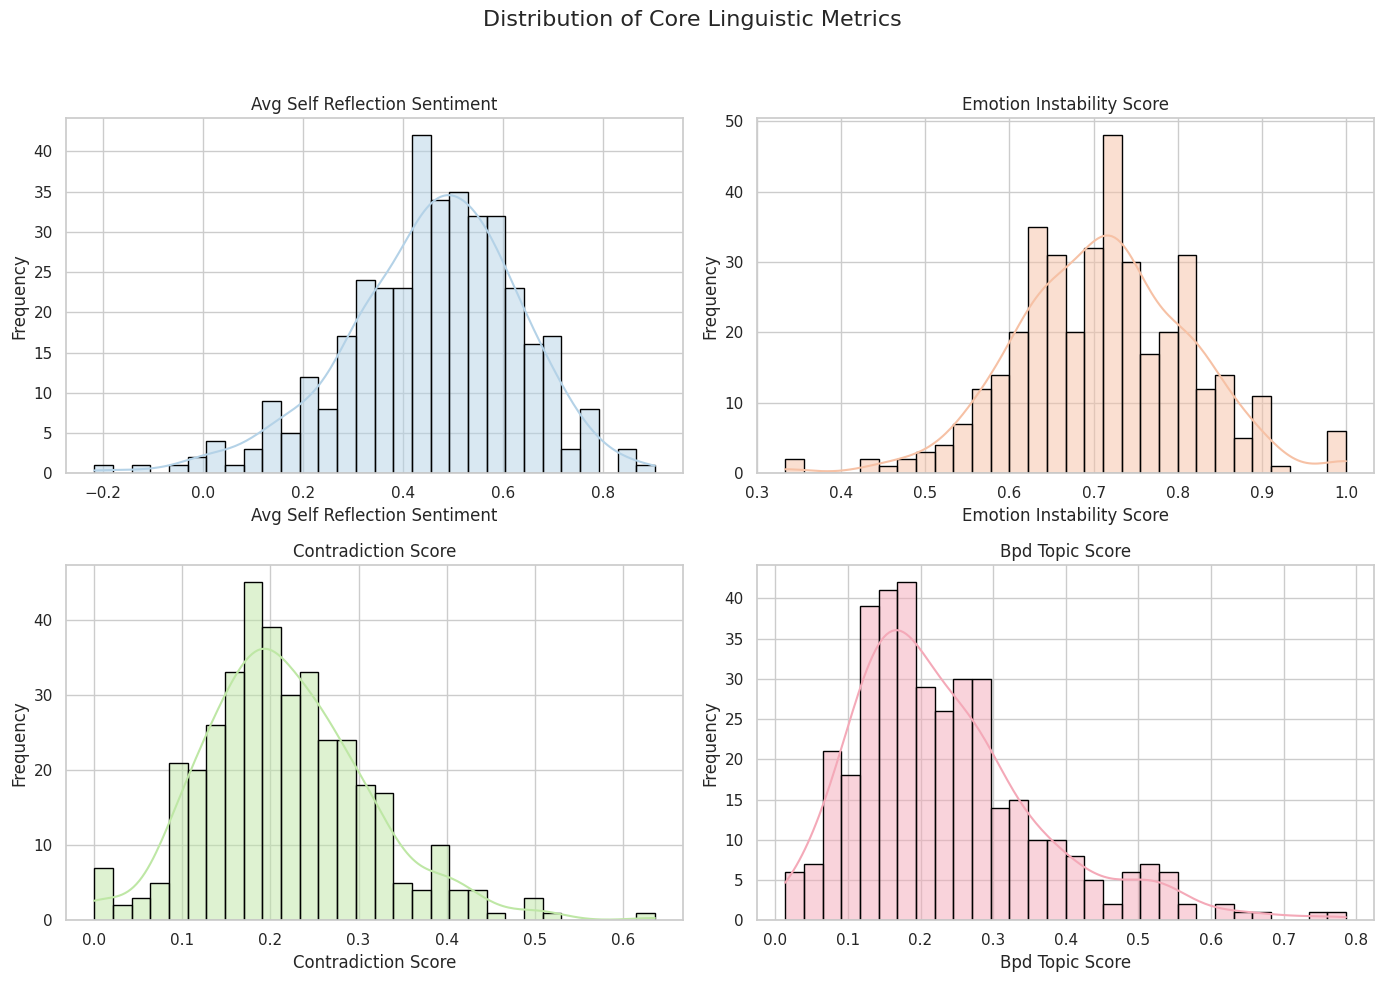

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Define metrics and custom pastel colors
metrics = ['avg_self_reflection_sentiment', 'emotion_instability_score',
           'contradiction_score', 'bpd_topic_score']

colors = ['#B4D2E7', '#F6C1A5', '#BEE7A5', '#F4A9B8']  # refined pastel shades

# Create histograms with one color each
plt.figure(figsize=(14, 10))
for i, (metric, color) in enumerate(zip(metrics, colors), 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=merged, x=metric, bins=30, kde=True, color=color, edgecolor='black')
    plt.title(f'{metric.replace("_", " ").title()}', fontsize=12)
    plt.xlabel(metric.replace("_", " ").title())
    plt.ylabel("Frequency")

plt.suptitle("Distribution of Core Linguistic Metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



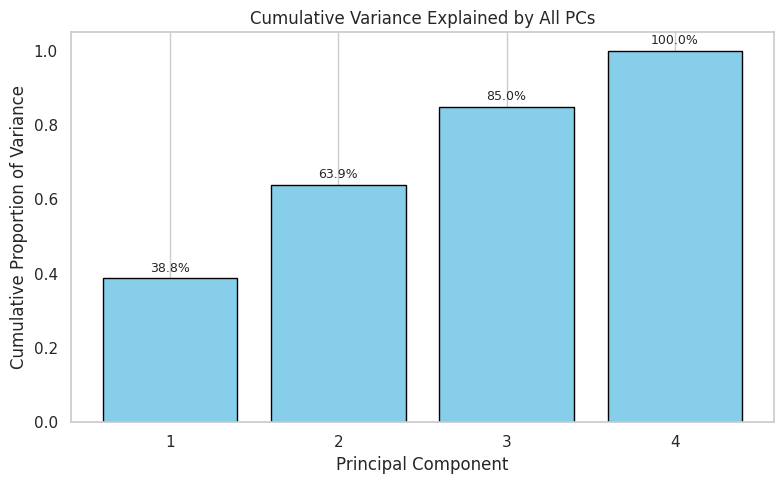

<ipython-input-11-16d4726d444e>:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings.PC1[i]*2, loadings.PC2[i]*2,
<ipython-input-11-16d4726d444e>:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.PC1[i]*2.2, loadings.PC2[i]*2.2,


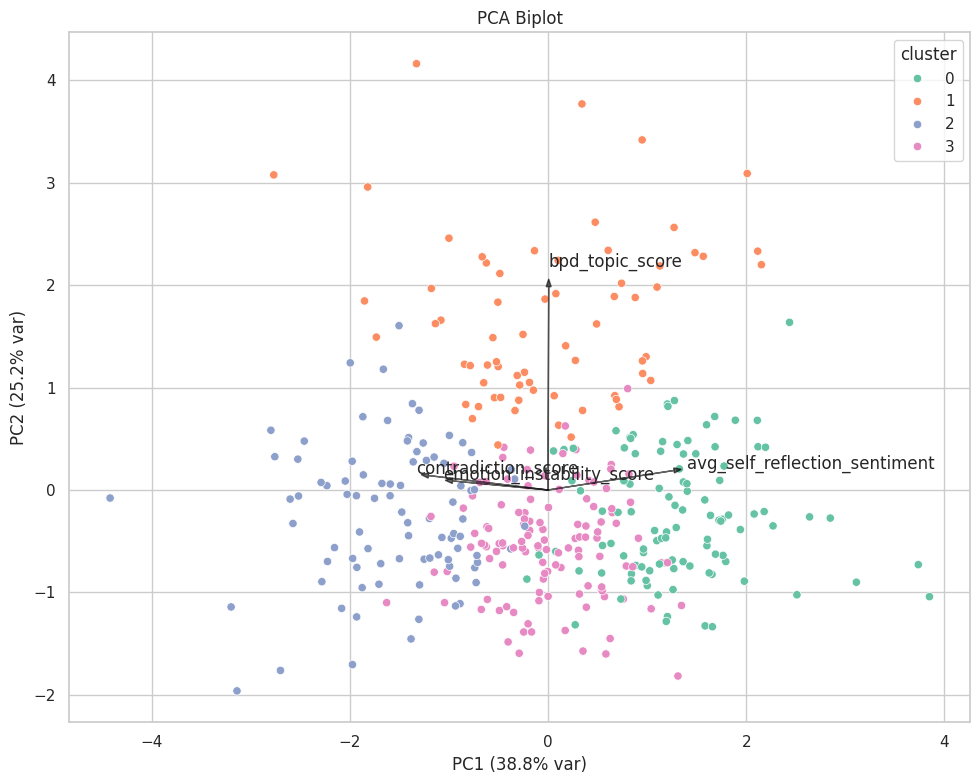


Cluster feature summary:


avg_self_reflection_sentiment              emotion_instability_score  \
                                 mean    std count                      mean   
cluster                                                                        
0                               0.589  0.120   104                     0.611   
1                               0.462  0.159    67                     0.712   
2                               0.297  0.179    88                     0.758   
3                               0.463  0.105   121                     0.762   

                     contradiction_score              bpd_topic_score         \
           std count                mean    std count            mean    std   
cluster                                                                        
0        0.071   104               0.159  0.062   104           0.203  0.077   
1        0.097    67               0.223  0.070    67           0.452  0.106   
2        0.094    88               0.333  0.077    88           0.201  0.083   
3        0.072   121               0.181  0.064   121           0.167  0.068   

               
        count  
cluster        
0         104  
1          67  
2          88  
3         121

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------------
# Load dataset
# ------------------------------------------------------------------
merged = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/BPD_scores.csv")
# merged['sentiment_inverted'] = -merged['avg_self_reflection_sentiment']
# print(merged['sentiment_inverted'])
# Select aligned features
features = ['avg_self_reflection_sentiment', 'emotion_instability_score',
            'contradiction_score', 'bpd_topic_score']
X = merged[features]

# ------------------------------------------------------------------
# Standardize and PCA
# ------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
merged['PCA1'] = X_pca[:, 0]
merged['PCA2'] = X_pca[:, 1]

# ------------------------------------------------------------------
# Scree plot: Cumulative variance explained
# ------------------------------------------------------------------
pca_full = PCA()
pca_full.fit(X_scaled)
cum_var = pca_full.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, len(cum_var) + 1), cum_var, color='skyblue', edgecolor='black')
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f"{height*100:.1f}%", ha='center', va='bottom', fontsize=9)
plt.title("Cumulative Variance Explained by All PCs")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance")
plt.xticks(range(1, len(cum_var) + 1))
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# K-Means Clustering
# ------------------------------------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_scaled)

# ------------------------------------------------------------------
# Biplot with clusters
# ------------------------------------------------------------------
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=merged['PCA1'], y=merged['PCA2'],
                hue=merged['cluster'], palette='Set2')
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, loadings.PC1[i]*2, loadings.PC2[i]*2,
              color='black', alpha=0.6, head_width=0.05)
    plt.text(loadings.PC1[i]*2.2, loadings.PC2[i]*2.2,
             feature, fontsize=12)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}% var)")
plt.title("PCA Biplot")
plt.grid(True)
plt.tight_layout()
plt.show()

# # ------------------------------------------------------------------
# # PCA Scatterplot with clusters
# # ------------------------------------------------------------------
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=merged, x='PCA1', y='PCA2',
#                 hue='cluster', palette='Set2')
# plt.title("User Clusters in PCA Space")
# plt.tight_layout()
# plt.show()

# ------------------------------------------------------------------
# Cluster-wise Feature Summary
# ------------------------------------------------------------------
cluster_summary = (
    merged
    .groupby('cluster')[features]
    .agg(['mean', 'std', 'count'])
    .round(3)
)

print("\nCluster feature summary:")
cluster_summary


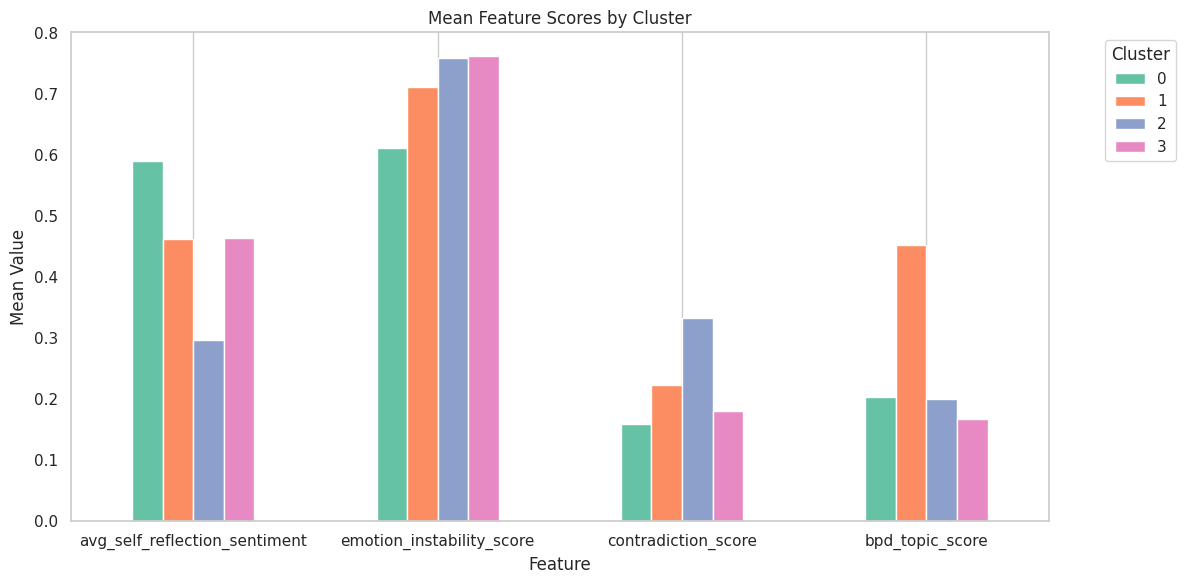

In [12]:
# Define features again since it's missing in this context
features = ['avg_self_reflection_sentiment',
            'emotion_instability_score',
            'contradiction_score',
            'bpd_topic_score']

# Recalculate cluster means for bar chart
cluster_means = merged.groupby('cluster')[features].mean()

# Create consistent color palette (Set2 from PCA plot)
cluster_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plot bar chart for intercluster feature comparison
ax = cluster_means.T.plot(kind='bar', figsize=(12, 6), color=cluster_colors)
plt.title("Mean Feature Scores by Cluster")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=0)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Recalculate PCA and loadings
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
feature_names = ['avg_self_reflection_sentiment', 'emotion_instability_score', 'contradiction_score', 'bpd_topic_score']
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)

# Get PC1 loadings
loadings_pc1 = loadings['PC1']

# Create composite score as weighted average using PC1 loadings
X_weighted = X_scaled @ loadings_pc1.values
merged['pc1_weighted_score'] = X_weighted

# Perform ANOVA to test score differences across clusters
anova_model = ols('pc1_weighted_score ~ C(cluster)', data=merged).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

anova_table.round(4)

,sum_sq,df,F,PR(>F)
C(cluster),390.8858,3.0,246.6598,0.0
Residual,198.6178,376.0,NaN,NaN


# Control Group Analysis (PCA + Clustering)

In [ ]:
import pandas as pd
import os

# ------------------------------------------------------------------
# 1. Load the datasets
# ------------------------------------------------------------------
user_sentiment = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/user_sentiment_scores.csv")
control = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/CONTROL_scores.csv")

# ------------------------------------------------------------------
# 2. Invert the raw sentiment scores (higher → more negative)
# ------------------------------------------------------------------
user_sentiment['avg_self_reflection_sentiment'] = (-user_sentiment['avg_self_reflection_sentiment'])

# ------------------------------------------------------------------
# 3. Merge the inverted scores into the control file by user
#    (this overwrites the existing sentiment column)
# ------------------------------------------------------------------
control_updated = (
    control
    .drop(columns=['avg_self_reflection_sentiment'], errors='ignore')
    .merge(
        user_sentiment[['user', 'avg_self_reflection_sentiment']],
        on='user',
        how='left'
    )
)

# ------------------------------------------------------------------
# 4. Save to the desired location
#    (create the directory if it doesn’t exist)
# ------------------------------------------------------------------
output_dir = "/content/drive/MyDrive/Psyche - NLP Project/Result"
os.makedirs(output_dir, exist_ok=True)

output_path = f"{output_dir}/CONTROL_GROUP_scores.csv"
control_updated.to_csv(output_path, index=False)

print("Saved corrected file to:", output_path)


Saved corrected file to: /content/drive/MyDrive/Psyche - NLP Project/Result/CONTROL_GROUP_scores.csv


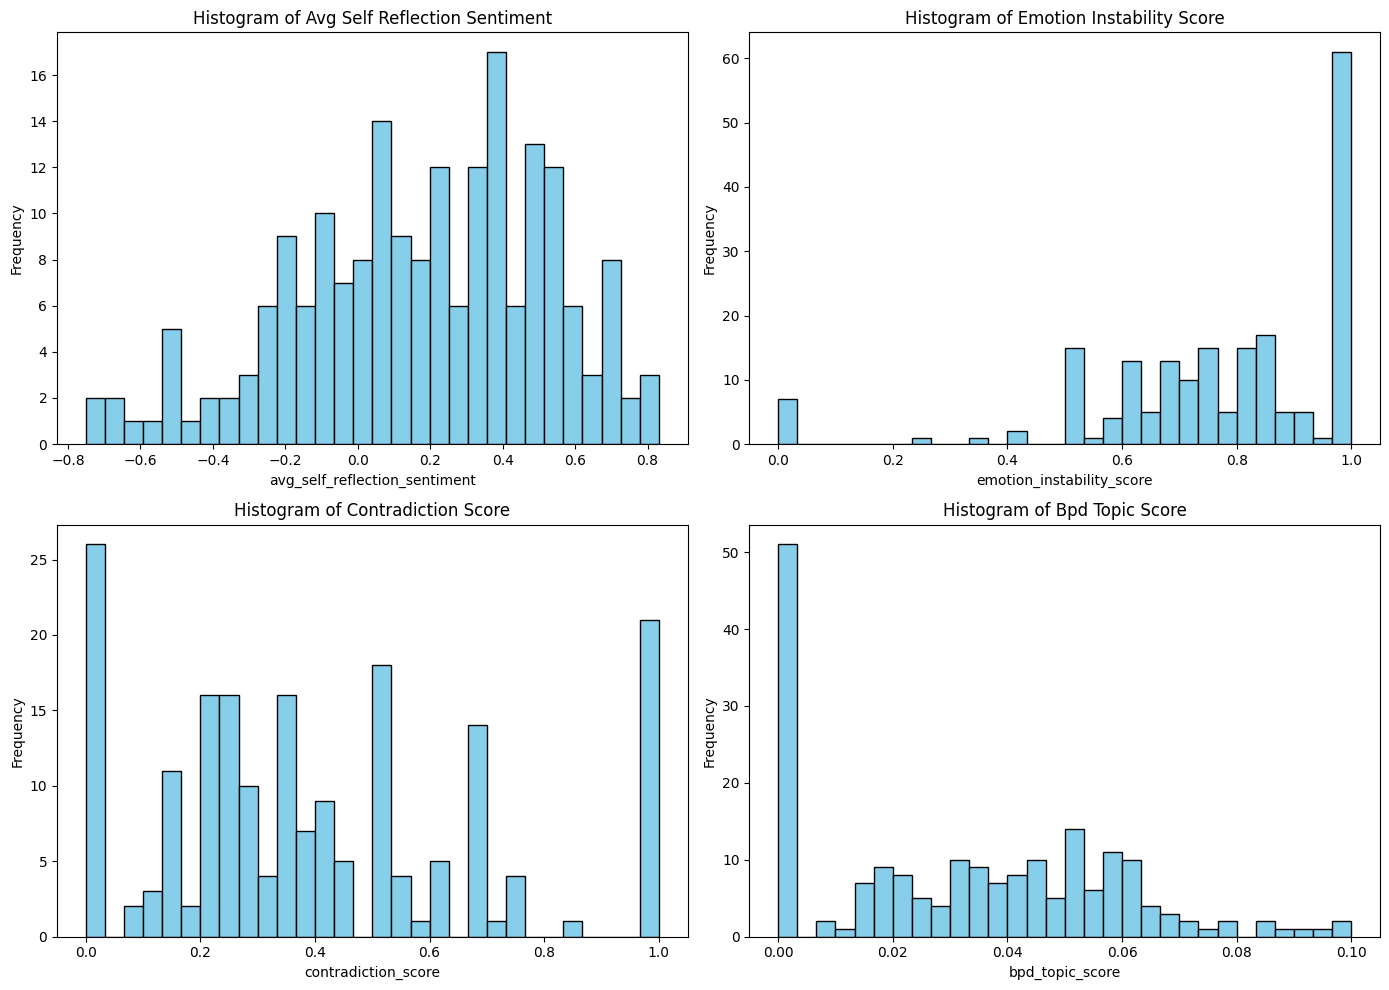

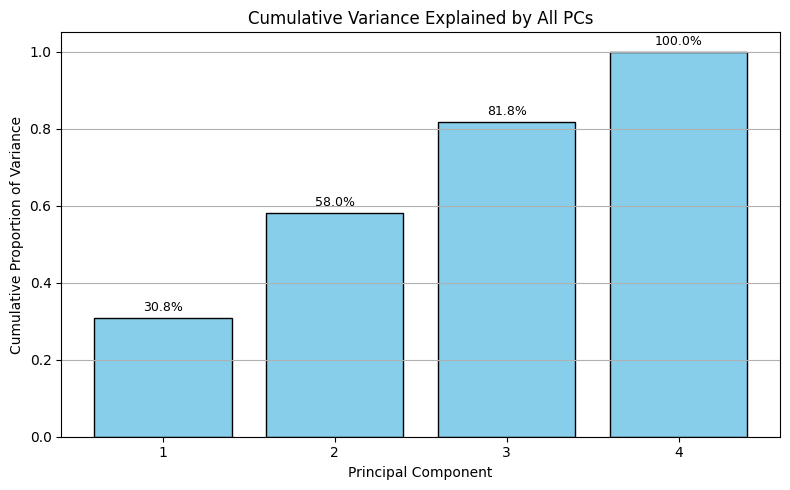

<ipython-input-65-2852fac4823b>:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings.PC1[i]*2, loadings.PC2[i]*2, color='black', alpha=0.6, head_width=0.05)
<ipython-input-65-2852fac4823b>:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.PC1[i]*2.2, loadings.PC2[i]*2.2, feature, fontsize=12)


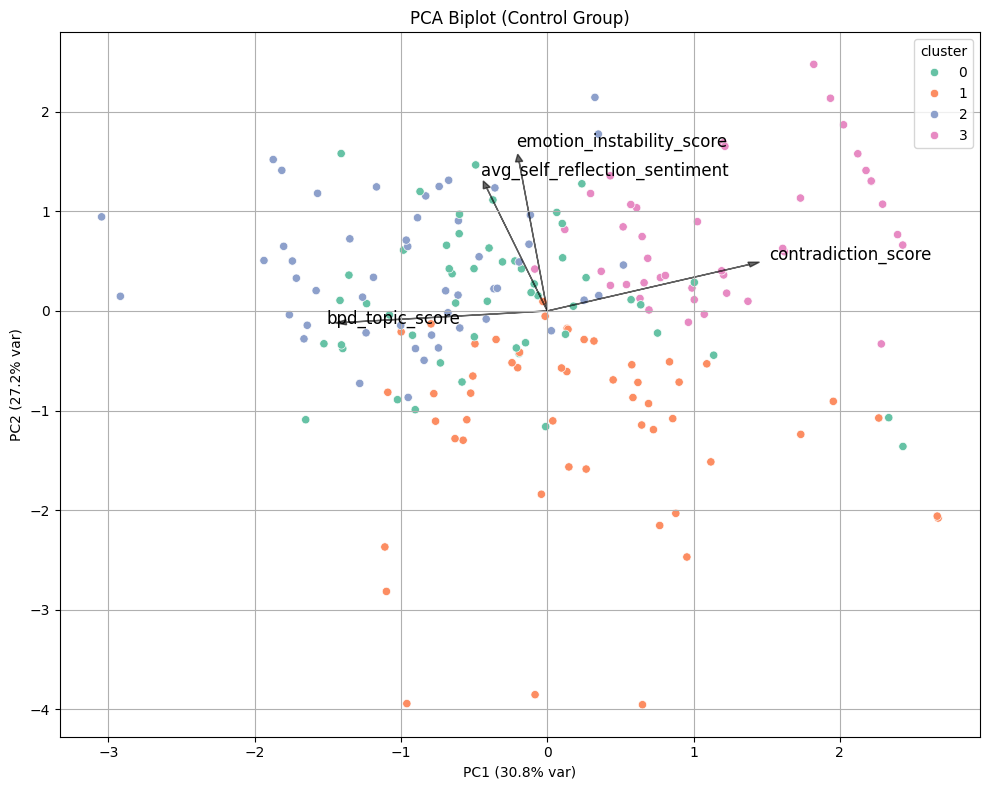

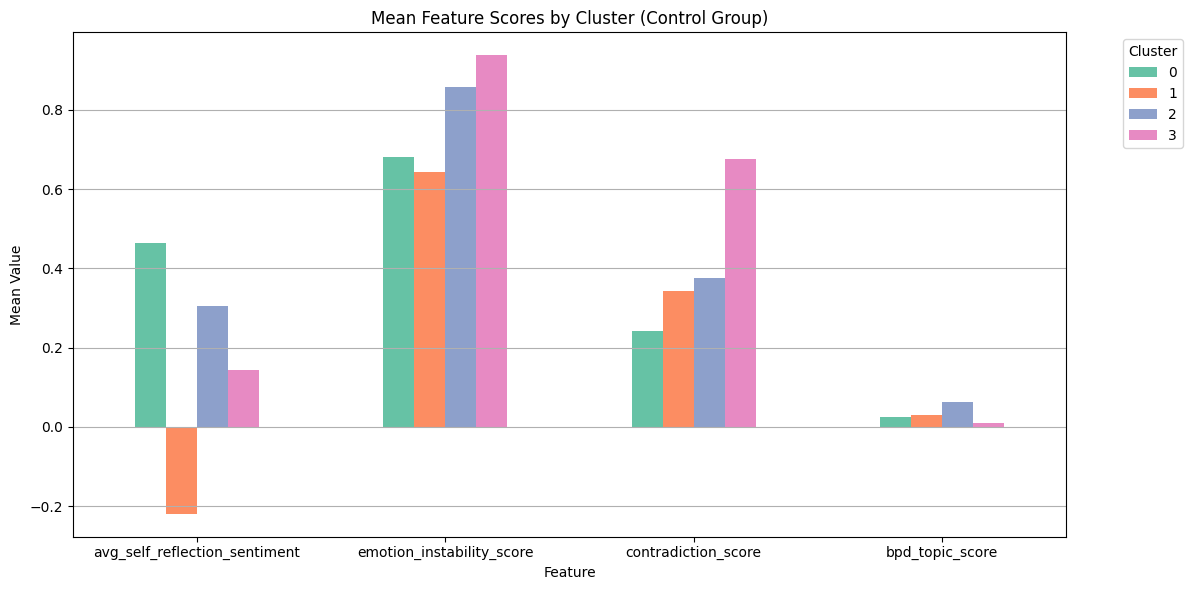


📊 Feature: Avg Self Reflection Sentiment
          mean    std
cluster              
0        0.464  0.167
1       -0.219  0.227
2        0.305  0.236
3        0.143  0.293

📊 Feature: Emotion Instability Score
          mean    std
cluster              
0        0.682  0.208
1        0.643  0.279
2        0.857  0.133
3        0.938  0.104

📊 Feature: Contradiction Score
          mean    std
cluster              
0        0.242  0.213
1        0.343  0.268
2        0.376  0.263
3        0.676  0.243

📊 Feature: Bpd Topic Score
          mean    std
cluster              
0        0.026  0.019
1        0.029  0.022
2        0.062  0.016
3        0.011  0.015


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------------
# Load CONTROL_GROUP dataset (with raw sentiment merged)
# ------------------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/CONTROL_GROUP_scores.csv")


# ------------------------------------------------------------------
# Define aligned features
# ------------------------------------------------------------------
features = ['avg_self_reflection_sentiment', 'emotion_instability_score', 'contradiction_score', 'bpd_topic_score']
X = df[features]

# ------------------------------------------------------------------
# Histograms of each metric
# ------------------------------------------------------------------
plt.figure(figsize=(14, 10))
for i, metric in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[metric], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {metric.replace("_", " ").title()}')
    plt.xlabel(metric)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# Standardize features
# ------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------------
# PCA analysis
# ------------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Full PCA for scree plot
pca_full = PCA()
pca_full.fit(X_scaled)
cum_var = pca_full.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, len(cum_var) + 1), cum_var, color='skyblue', edgecolor='black')
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height*100:.1f}%", ha='center', va='bottom', fontsize=9)
plt.title("Cumulative Variance Explained by All PCs")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance")
plt.xticks(range(1, len(cum_var) + 1))
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# KMeans clustering
# ------------------------------------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# ------------------------------------------------------------------
# PCA biplot
# ------------------------------------------------------------------
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['cluster'], palette='Set2')
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings.PC1[i]*2, loadings.PC2[i]*2, color='black', alpha=0.6, head_width=0.05)
    plt.text(loadings.PC1[i]*2.2, loadings.PC2[i]*2.2, feature, fontsize=12)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}% var)")
plt.title("PCA Biplot (Control Group)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# Cluster summary
# ------------------------------------------------------------------
cluster_summary = (
    df
    .groupby('cluster')[features]
    .agg(['mean', 'std', 'count'])
    .round(3)
)

# ------------------------------------------------------------------
# Inter-cluster feature comparison (bar chart)
# ------------------------------------------------------------------
cluster_means = df.groupby('cluster')[features].mean()
cluster_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # Set2 palette

ax = cluster_means.T.plot(kind='bar', figsize=(12, 6), color=cluster_colors)
plt.title("Mean Feature Scores by Cluster (Control Group)")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=0)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Print summary per feature
for feature in features:
    print(f"\n📊 Feature: {feature.replace('_', ' ').title()}")
    summary = df.groupby('cluster')[feature].agg(['mean', 'std']).round(3)
    print(summary)

# Comparison (PCA + LDA)

<ipython-input-11-d76c9eca1209>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=combined_df, x=feature, hue='group', element='step',
<ipython-input-11-d76c9eca1209>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=combined_df, x=feature, hue='group', element='step',
<ipython-input-11-d76c9eca1209>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=combined_df, x=feature, hue='group', element='step',
<ipython-input-11-d76c9eca1209>:37: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=combined_df, x=feature, hue='group', element='step',


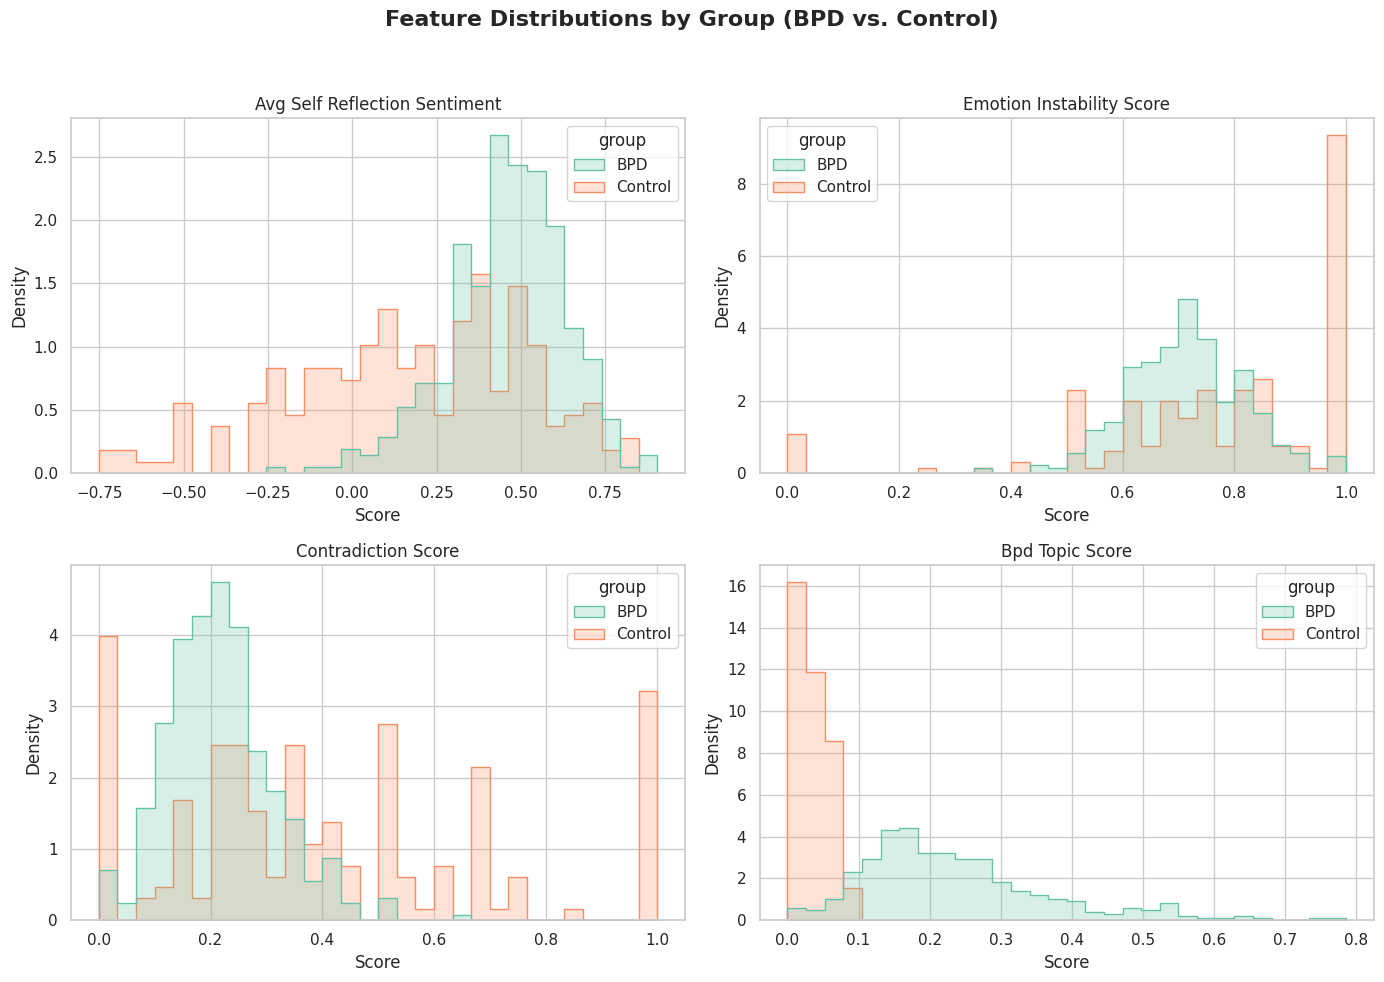

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------
# Load datasets
# ------------------------------------------------------------------
bpd_df = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/BPD_scores.csv")
control_df = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/CONTROL_GROUP_scores.csv")

# ------------------------------------------------------------------
# Label groups and combine
# ------------------------------------------------------------------
bpd_df['group'] = 'BPD'
control_df['group'] = 'Control'

# Select only needed columns and match structure
features = ['avg_self_reflection_sentiment', 'emotion_instability_score',
            'contradiction_score', 'bpd_topic_score']

combined_df = pd.concat([
    bpd_df[features + ['group']],
    control_df[features + ['group']]
], ignore_index=True)

# ------------------------------------------------------------------
# Plot 2x2 grid of side-by-side histograms
# ------------------------------------------------------------------
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=combined_df, x=feature, hue='group', element='step',
                 stat='density', common_norm=False, bins=30,
                 palette=palette, ax=ax)
    ax.set_title(f'{feature.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel("Score")
    ax.set_ylabel("Density")
    ax.grid(True)

# Add main title and adjust spacing
fig.suptitle("Feature Distributions by Group (BPD vs. Control)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


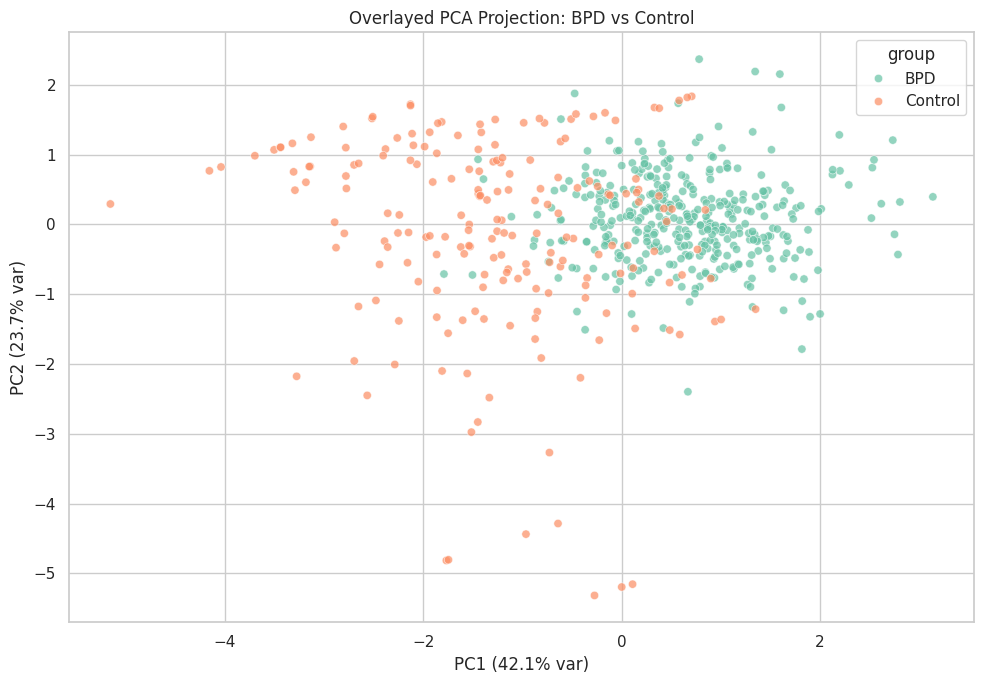

<ipython-input-12-a90103cf8aa4>:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings.PC1[i]*2, loadings.PC2[i]*2,
<ipython-input-12-a90103cf8aa4>:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.PC1[i]*2.3, loadings.PC2[i]*2.3, feature, fontsize=12)


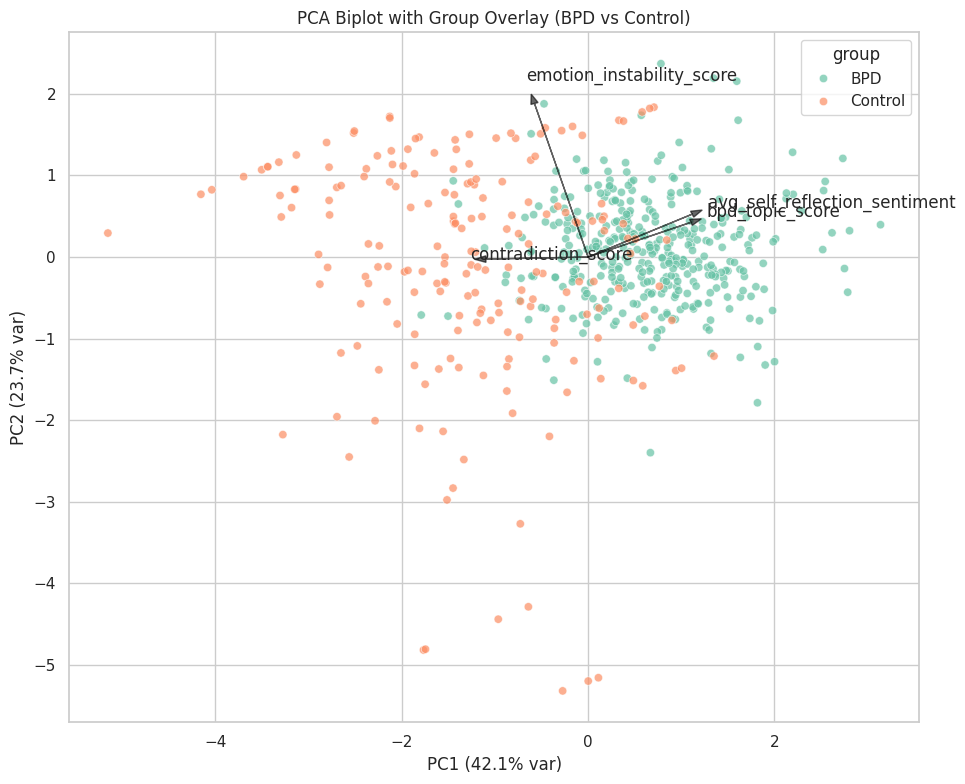

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------------
# Load datasets
# ------------------------------------------------------------------
bpd_df = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/BPD_scores.csv")
control_df = pd.read_csv("/content/drive/MyDrive/Psyche - NLP Project/Result/CONTROL_GROUP_scores.csv")

# ------------------------------------------------------------------
# Add group labels
# ------------------------------------------------------------------
bpd_df['group'] = 'BPD'
control_df['group'] = 'Control'

# ------------------------------------------------------------------
# Combine datasets
# ------------------------------------------------------------------
features = ['avg_self_reflection_sentiment', 'emotion_instability_score',
            'contradiction_score', 'bpd_topic_score']

combined_df = pd.concat([
    bpd_df[features + ['group']],
    control_df[features + ['group']]
], ignore_index=True)

# ------------------------------------------------------------------
# Standardize features
# ------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df[features])

# ------------------------------------------------------------------
# PCA transformation
# ------------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
combined_df['PCA1'] = X_pca[:, 0]
combined_df['PCA2'] = X_pca[:, 1]

# ------------------------------------------------------------------
# Plot PCA overlay
# ------------------------------------------------------------------
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='group', palette='Set2', alpha=0.7)
plt.title("Overlayed PCA Projection: BPD vs Control")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot PCA projection with overlaid biplot vectors
plt.figure(figsize=(10, 8))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='group', palette='Set2', alpha=0.7)

# Add biplot arrows
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings.PC1[i]*2, loadings.PC2[i]*2,
              color='black', alpha=0.6, head_width=0.08)
    plt.text(loadings.PC1[i]*2.3, loadings.PC2[i]*2.3, feature, fontsize=12)

# Labels and layout
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA Biplot with Group Overlay (BPD vs Control)")
plt.grid(True)
plt.tight_layout()
plt.show()


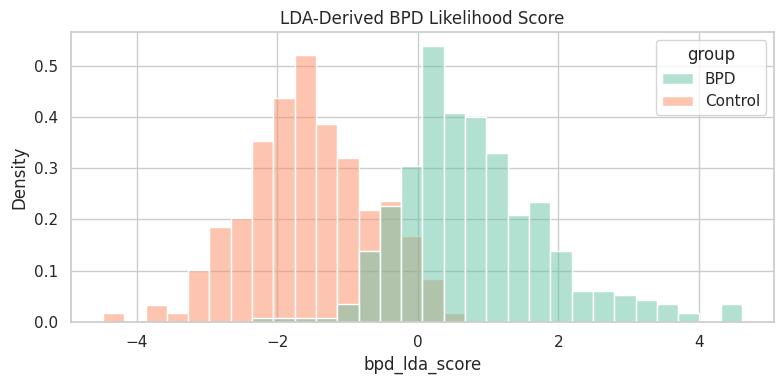

LDA Weight Vector (Discriminative Coefficients):
avg_self_reflection_sentiment    1.148
emotion_instability_score       -0.336
contradiction_score             -0.839
bpd_topic_score                  2.491
dtype: float64


<ipython-input-13-8ff2ded3a53b>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lda_coeffs.values, y=lda_coeffs.index, palette='viridis')


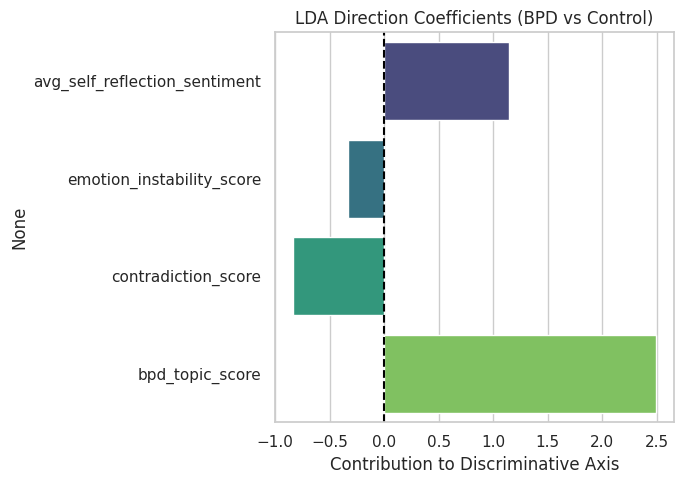

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assign group labels (0=Control, 1=BPD)
combined_df['group_num'] = combined_df['group'].map({'Control': 0, 'BPD': 1})

# Fit LDA
lda = LDA(n_components=1)
lda_proj = lda.fit_transform(X_scaled, combined_df['group_num'])

# Add LDA-based BPD-likelihood score
combined_df['bpd_lda_score'] = lda_proj

# Plot distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(data=combined_df, x='bpd_lda_score', hue='group', stat='density', common_norm=False, bins=30, palette='Set2')
plt.title("LDA-Derived BPD Likelihood Score")
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Features
features = ['avg_self_reflection_sentiment', 'emotion_instability_score',
            'contradiction_score', 'bpd_topic_score']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df[features])
y = combined_df['group'].map({'Control': 0, 'BPD': 1})  # numeric labels

# Fit LDA
lda = LDA(n_components=1)
lda.fit(X_scaled, y)

# Get coefficients (1D direction vector)
lda_coeffs = pd.Series(lda.coef_[0], index=features)
print("LDA Weight Vector (Discriminative Coefficients):")
print(lda_coeffs.round(3))


# Plot like a biplot (but in 1D)
plt.figure(figsize=(7, 5))
sns.barplot(x=lda_coeffs.values, y=lda_coeffs.index, palette='viridis')
plt.axvline(0, color='black', linestyle='--')
plt.title("LDA Direction Coefficients (BPD vs Control)")
plt.xlabel("Contribution to Discriminative Axis")
plt.tight_layout()
plt.show()



AUC (Test Set): 0.918
Accuracy: 0.8017241379310345
Precision: 0.9354838709677419
Recall: 0.7532467532467533


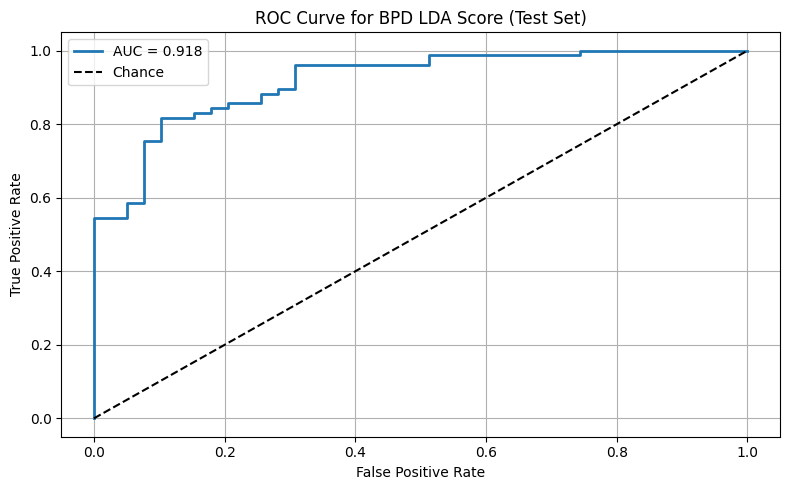

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Features and labels
# -----------------------------
features = ['avg_self_reflection_sentiment', 'emotion_instability_score',
            'contradiction_score', 'bpd_topic_score']
X = combined_df[features]
y = combined_df['group'].map({'Control': 0, 'BPD': 1})  # binary labels

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# Standardize
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Train LDA
# -----------------------------
lda = LDA(n_components=1)
lda.fit(X_train_scaled, y_train)

# -----------------------------
# Predict LDA scores
# -----------------------------
y_test_scores = lda.transform(X_test_scaled)

# -----------------------------
# Evaluate performance
# -----------------------------
auc = roc_auc_score(y_test, y_test_scores)
y_test_pred = (y_test_scores > 0).astype(int)

print(f"AUC (Test Set): {auc:.3f}")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))

# -----------------------------
# ROC Curve Plot
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for BPD LDA Score (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
